In [2]:
import os
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from typing import List, Optional

In [3]:
plt_config = {"title": {"fontweight":"bold", "fontsize":14},
              "axis": {"fontweight":"normal", "fontsize":12},
              }


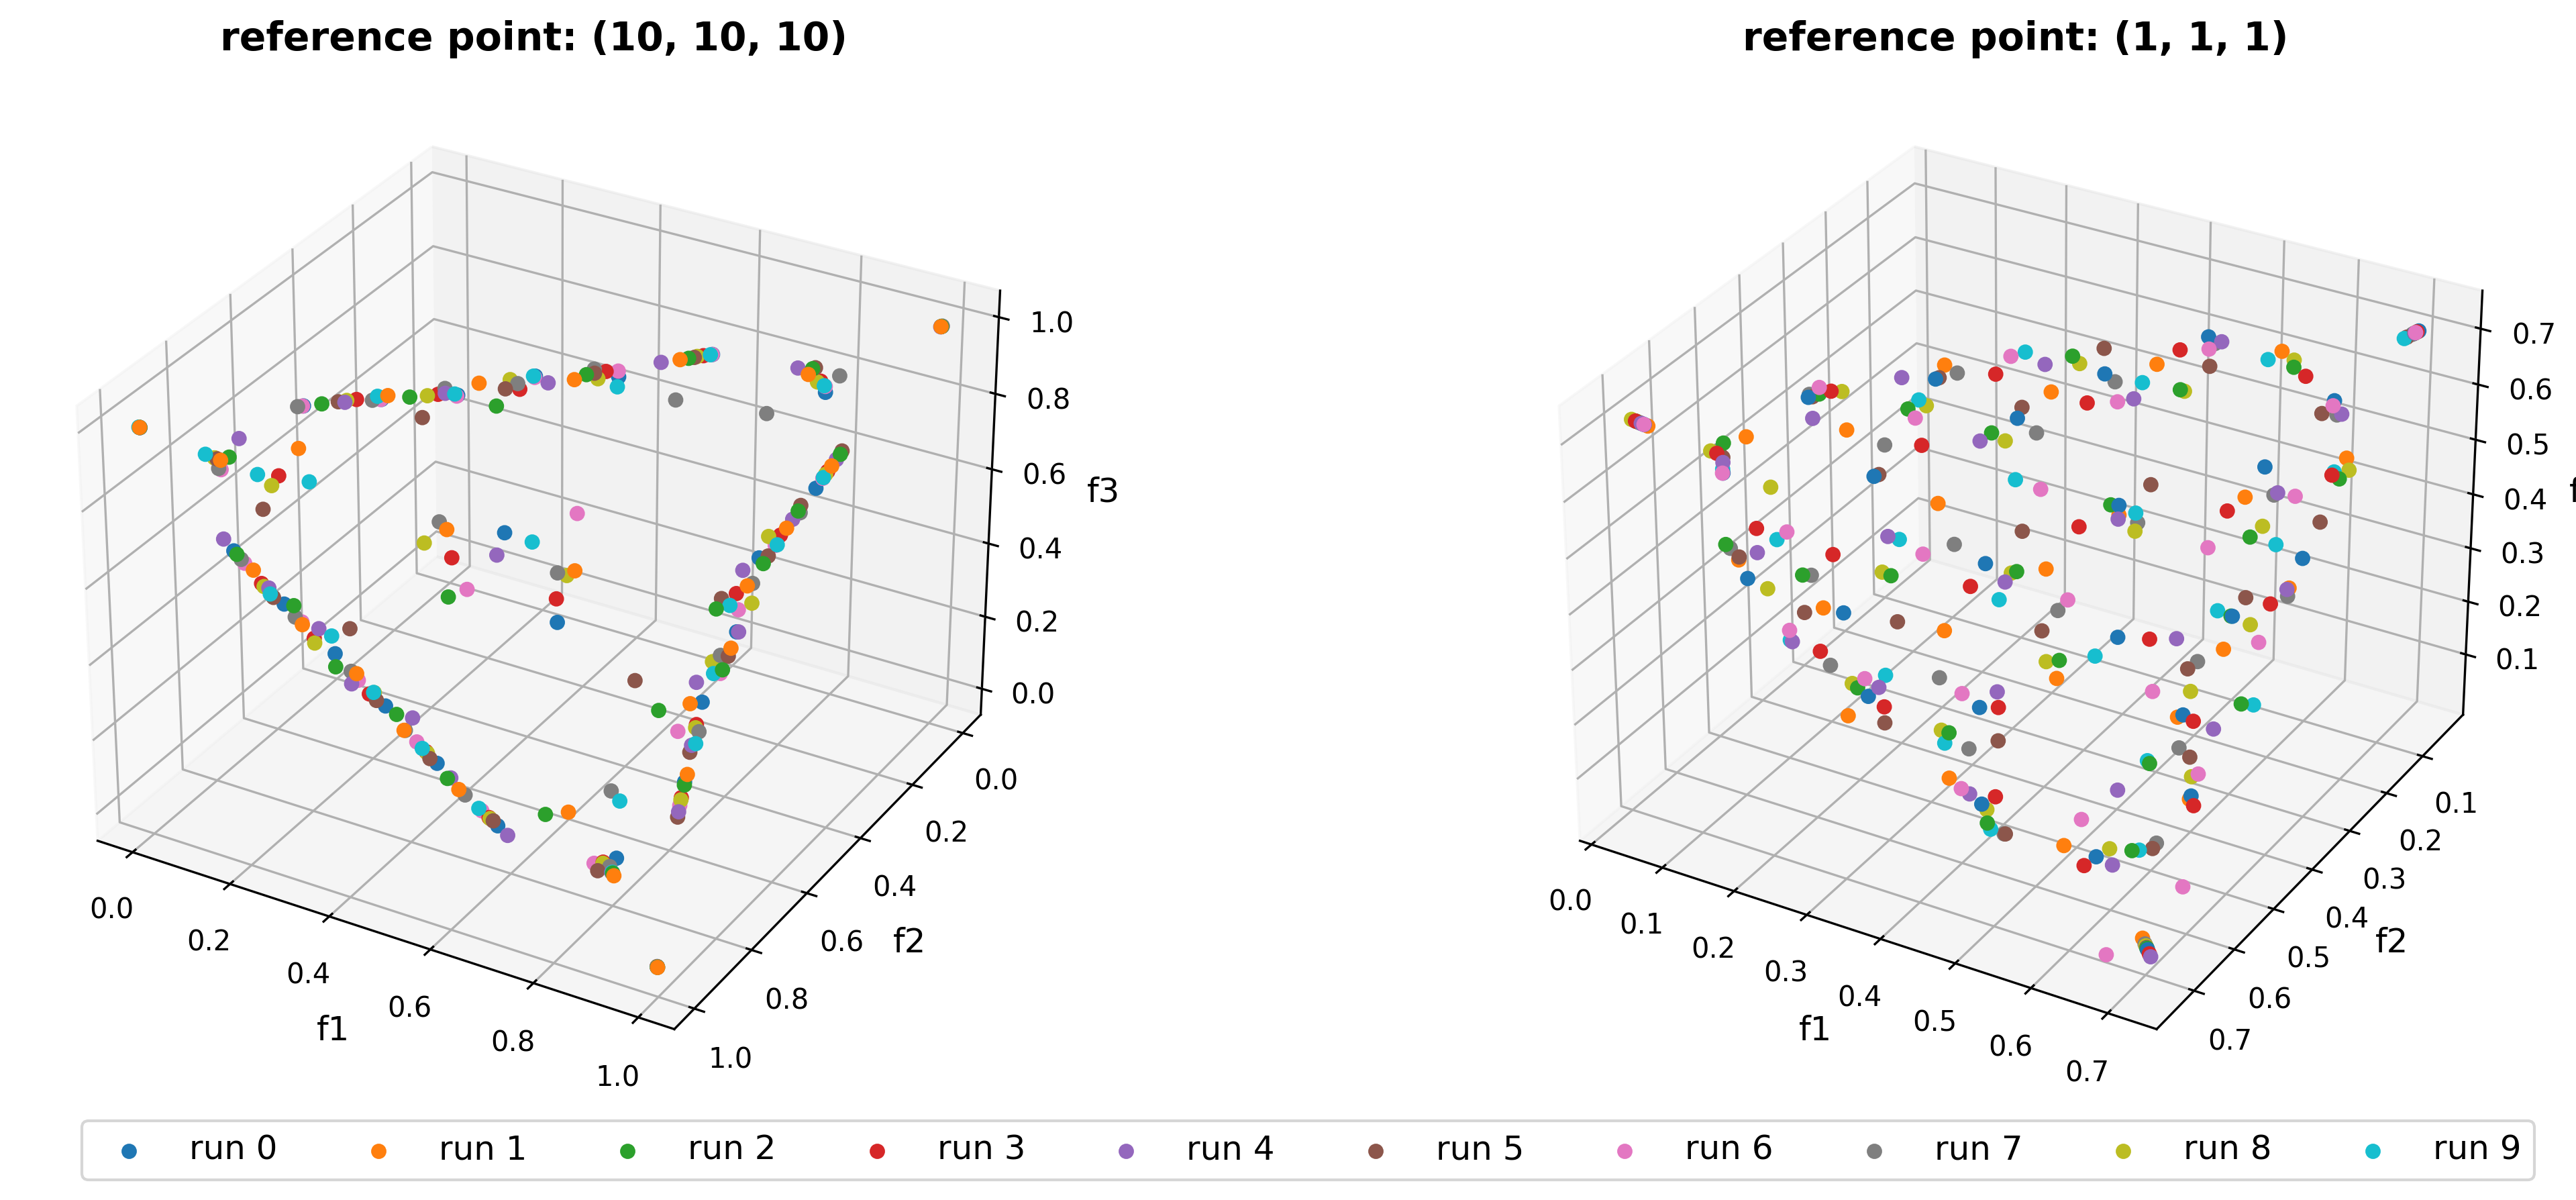

In [15]:
root_path = "../runs/figures_for_paper/"
experiment_names = ["reference point: (10, 10, 10)", "reference point: (1, 1, 1)"]
experiment_paths = ["genmed_convex_25102023_154523",
                    # "genmed_convex_ref1.1_1.1_1.1_nrun10_26102023_130749",]
                    "genmed_convex_ref111_nrun10_25102023_161343"]
loss_functions = ["f1", "f2", "f3"]
colors = ['k', 'r']
NRUNS = 10
cmap = matplotlib.colormaps["tab10"](np.linspace(0, 1, NRUNS))


elev, azim, roll = (30, -60, 0)
fig, ax = plt.subplots(1, 2, figsize=(15, 6), dpi=300, subplot_kw={'projection': '3d'})
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.95)

for idx, experiment_name in enumerate(experiment_names):
    all_losses = []
    for i_run in range(NRUNS):
        filepath = os.path.join(root_path, experiment_paths[idx], "fold0", f"run{i_run}", "val", "loss.npy")
        losses = np.squeeze(np.load(filepath))
        all_losses.append(losses)
        ax[idx].scatter(losses[0,:], losses[1,:], losses[2,:], color=cmap[i_run], label=f"run {i_run}", alpha=1)
    
    # mean_losses = np.array(all_losses).mean(axis=0)
    # ax[idx].scatter(mean_losses[0,:], mean_losses[1,:], mean_losses[2,:], color='k')
    
    ax[idx].set_xlabel(loss_functions[0], **plt_config["axis"])
    ax[idx].set_ylabel(loss_functions[1], **plt_config["axis"])
    ax[idx].set_zlabel(loss_functions[2], **plt_config["axis"])
    ax[idx].invert_yaxis()
    ax[idx].view_init(elev, azim, roll)

    title_a = ax[idx].set_title(experiment_name, **plt_config["title"])

ax[1].legend(ncol=NRUNS, loc="lower left", bbox_to_anchor=[-1.4, -0.1, 1, 1], fontsize=12)

plt.show()
fig.savefig(f"../outputs/genmed.png")